The article "prediction of Wine Quality Using Machine Learning" states that it used the red wine dataset. Paragraph 2.1 mentions that the dataset contains 4898 entries. When examing the datasets, this number corresponds to the white wine dataset. This confusion in consistent throughout the article. From this point on the white wine dataset will be used, eventhough the article states that the red wine dataset is used.

In [11]:

pip install scikit-learn==1.5.2


Note: you may need to restart the kernel to use updated packages.


In [12]:

pip install scikeras


Note: you may need to restart the kernel to use updated packages.


In [13]:
from xml.sax.handler import feature_string_interning

# used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.stats import pearsonr


from skopt import BayesSearchCV
from skopt.space import Real, Integer
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam








In [14]:
#import the winequality dataset

# Define the relative path to the CSV file
relative_path = 'wine+quality/winequality-white.csv'
# Read the CSV file using pandas
wine_df = pd.read_csv(relative_path, delimiter=';')

features = wine_df.drop('quality', axis=1)
target = wine_df['quality']



Feature scaling was applied using standardization. Following code standardizes the dataset.

In [15]:
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)

feature_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

Create the train, validation and test set from the original data set

In [16]:
# Step 1: Split the data into training and temporary sets
# The training set will contain 60% of the data, and the temporary set will contain 40% of the data
features_train, features_temp, target_train, target_temp = train_test_split(features_scaled, target, test_size=0.4, random_state=1)

# Step 1: Split the data into training and temporary sets
# The training set will contain 60% of the data, and the temporary set will contain 40% of the data
features_test, features_validate, target_test, target_validate = train_test_split(features_temp, target_temp, test_size=0.5, random_state=1)

# Now, features_train and target_train contain the training data (60% of the original data)
# features_test and target_test contain the testing data (20% of the original data)
# features_validate and target_validate contain the validation data (20% of the original data)


Create a ANN model with:
- 1 input layer with 11 neurons
- 3 hidden layers with 15 neurons
- 1 output layer with 1 neuron

In [17]:
# Function to calculate metrics (R, MSE, MAPE)
def calculate_metrics(y_true, y_pred):
    # Calculate R (Pearson correlation coefficient)   
    r, _ = pearsonr(y_true, y_pred)
    
    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    return r, mse, mape

In [ ]:

# Initialize lists to store metrics
train_r_values = []
train_mse_values = []
train_mape_values = []
test_r_values = []
test_mse_values = []
test_mape_values = []



# Repeat the experiment for random_state 1 to 100
for random_state in range(1, 100):
    # Split the data into training and temporary sets
    features_train, features_temp, target_train, target_temp = train_test_split(features_scaled, target, test_size=0.4, random_state=random_state)
    
    # Split the temporary set into testing and validation sets
    features_test, features_validate, target_test, target_validate = train_test_split(features_temp, target_temp, test_size=0.5, random_state=random_state)
    
    # Initialize the Sequential model
    model = Sequential()
    
    # Add the input layer with 11 features
    model.add(Input(shape=(11,)))  # Input layer with 11 features
    
    # Add the first hidden layer with 15 neurons and ReLU activation
    model.add(Dense(15, activation='relu'))  # First hidden layer
    
    # Add the second hidden layer with 15 neurons and ReLU activation
    model.add(Dense(15, activation='relu'))  # Second hidden layer
    
    # Add the third hidden layer with 15 neurons and ReLU activation
    model.add(Dense(15, activation='relu'))  # Third hidden layer
    
    # Add the output layer with 1 neuron and linear activation
    model.add(Dense(1, activation='linear'))  # Output layer
    
    # Compile the model with mean squared error loss and Adam optimizer
    # Also include mean squared error, mean absolute error, and mean absolute percentage error as metrics
    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])
    
    # Train the model with the training data
    history = model.fit(features_train, target_train, epochs=50, batch_size=32, validation_data=(features_validate, target_validate), verbose=0)
    
    # Make predictions on the training and test data
    train_predictions = model.predict(features_train)
    test_predictions = model.predict(features_test)

    # Convert to 1D numpy array
    train_predictions = train_predictions.flatten()
    test_predictions = test_predictions.flatten()
    
    # Calculate metrics for training data set
    train_r, train_mse, train_mape = calculate_metrics(target_train, train_predictions)
    
    # Calculate metrics for testing data set
    test_r, test_mse, test_mape = calculate_metrics(target_test, test_predictions)
    
    # Store the metrics in the lists
    train_r_values.append(train_r)
    train_mse_values.append(train_mse)
    train_mape_values.append(train_mape)
    test_r_values.append(test_r)
    test_mse_values.append(test_mse)
    test_mape_values.append(test_mape)

    print(random_state)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12
92/92 ━━━━━━━━━━━━━

In [ ]:
# Reference values for ANN model
reference_values_ann = {
    "Training Data Set": {"R": 0.66, "MSE": 0.37, "MAPE": 0.14},
    "Testing Data Set": {"R": 0.58, "MSE": 0.4, "MAPE": 0.12}
}


Training Data Set Metrics:
R values: [0.656922448809448, 0.6584454399495844]
MSE values: [0.4566199582698338, 0.44561579261459794]
MAPE values: [0.09428545457218805, 0.09269239543884367]

Testing Data Set Metrics:
R values: [0.573982699685402, 0.593507503186186]
MSE values: [0.5308083302896505, 0.4943298135315995]
MAPE values: [0.09843462120899692, 0.09610115911762113]


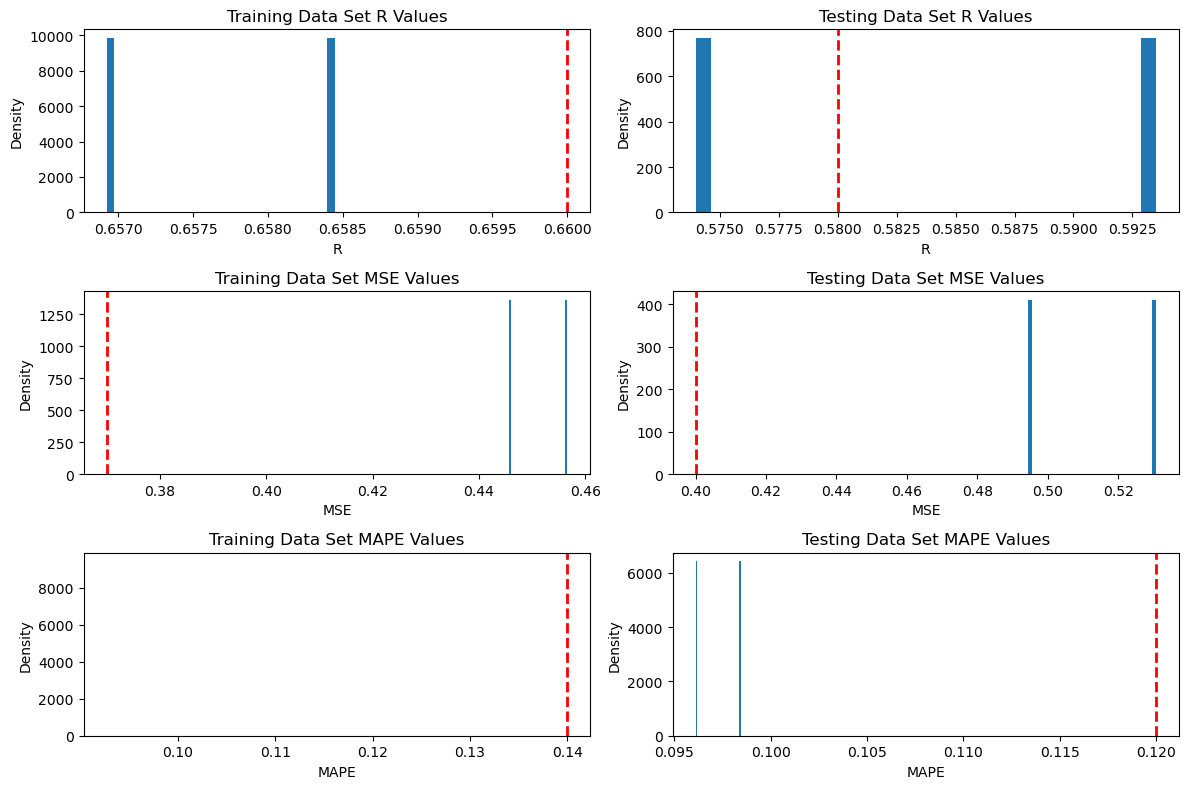

In [ ]:

# Print collected metrics for verification
print("Training Data Set Metrics:")
print("R values:", train_r_values)
print("MSE values:", train_mse_values)
print("MAPE values:", train_mape_values)

print("\nTesting Data Set Metrics:")
print("R values:", test_r_values)
print("MSE values:", test_mse_values)
print("MAPE values:", test_mape_values)

# Visualize the metrics in Gaussian curves along with reference values from ANN model
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.hist(train_r_values, bins=30, density=True)
plt.axvline(reference_values_ann["Training Data Set"]["R"], color='r', linestyle='dashed', linewidth=2)
plt.title('Training Data Set R Values')
plt.xlabel('R')
plt.ylabel('Density')

plt.subplot(3, 2, 2)
plt.hist(test_r_values, bins=30, density=True)
plt.axvline(reference_values_ann["Testing Data Set"]["R"], color='r', linestyle='dashed', linewidth=2)
plt.title('Testing Data Set R Values')
plt.xlabel('R')
plt.ylabel('Density')

plt.subplot(3, 2, 3)
plt.hist(train_mse_values, bins=30, density=True)
plt.axvline(reference_values_ann["Training Data Set"]["MSE"], color='r', linestyle='dashed', linewidth=2)
plt.title('Training Data Set MSE Values')
plt.xlabel('MSE')
plt.ylabel('Density')

plt.subplot(3, 2, 4)
plt.hist(test_mse_values, bins=30, density=True)
plt.axvline(reference_values_ann["Testing Data Set"]["MSE"], color='r', linestyle='dashed', linewidth=2)
plt.title('Testing Data Set MSE Values')
plt.xlabel('MSE')
plt.ylabel('Density')

plt.subplot(3, 2, 5)
plt.hist(train_mape_values, bins=30, density=True)
plt.axvline(reference_values_ann["Training Data Set"]["MAPE"], color='r', linestyle='dashed', linewidth=2)
plt.title('Training Data Set MAPE Values')
plt.xlabel('MAPE')
plt.ylabel('Density')

plt.subplot(3, 2, 6)
plt.hist(test_mape_values, bins=30, density=True)
plt.axvline(reference_values_ann["Testing Data Set"]["MAPE"], color='r', linestyle='dashed', linewidth=2)
plt.title('Testing Data Set MAPE Values')
plt.xlabel('MAPE')
plt.ylabel('Density')

plt.tight_layout()
plt.show()